<a href="https://colab.research.google.com/github/parth-mango/EVA5-Assignments/blob/main/EVA5%20S7/EVA_S7_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
def calc_rf(jin, k, rin):
    rout = rin + ((k-1) * jin)
    return rout

calc_rf(8,1,84)

84

In [ ]:
import model
import training
import reg_tech
import testing
import dataloaders

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

net= model.network()




classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
train_losses = []
test_losses = []

In [ ]:
batch_size= 128
model = net().to(device)
train_loader, test_loader, sample_loader = dataloaders.data_loaders(batch_size)
optimizer= reg_tech.hi_optimizer(model)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# !pip install torchsummary
from torchsummary import summary
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 64, 32, 32]          18,496
              ReLU-5           [-1, 64, 32, 32]               0
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7           [-1, 32, 32, 32]           2,080
         MaxPool2d-8           [-1, 32, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]          18,496
             ReLU-10           [-1, 64, 16, 16]               0
      BatchNorm2d-11           [-1, 64, 16, 16]             128
           Conv2d-12          [-1, 128, 12, 12]          73,856
             ReLU-13          [-1, 128, 12, 12]               0
      BatchNorm2d-14          [-1, 128,

/content/model.py:64: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


 deer   dog truck  ship


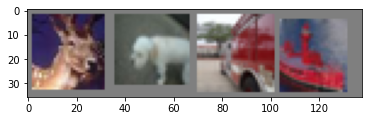

In [ ]:
import misc

misc.show_images(sample_loader, classes)

In [ ]:
for epoch in range(1, 35):
    training.train(model, device, train_loader, optimizer, epoch)
    test_loss = testing.test(model, device, test_loader)
    print('Epoch-{0} lr: {1}'.format(epoch, optimizer.param_groups[0]['lr']))

  0%|          | 0/391 [00:00<?, ?it/s]/content/model.py:64: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=1.3078023195266724 Batch_id=390 Accuracy=41.60: 100%|██████████| 391/391 [00:26<00:00, 14.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0106, Accuracy: 5125/10000 (51.25%)

Epoch-1 lr: 0.001


Loss=1.1037800312042236 Batch_id=390 Accuracy=57.21: 100%|██████████| 391/391 [00:25<00:00, 15.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0088, Accuracy: 5959/10000 (59.59%)

Epoch-2 lr: 0.001


Loss=0.9422881007194519 Batch_id=390 Accuracy=63.68: 100%|██████████| 391/391 [00:25<00:00, 15.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0080, Accuracy: 6409/10000 (64.09%)

Epoch-3 lr: 0.001


Loss=0.6564419865608215 Batch_id=390 Accuracy=68.20: 100%|██████████| 391/391 [00:25<00:00, 15.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0071, Accuracy: 6886/10000 (68.86%)

Epoch-4 lr: 0.001


Loss=0.6792171001434326 Batch_id=390 Accuracy=71.10: 100%|██████████| 391/391 [00:25<00:00, 15.31it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0065, Accuracy: 7156/10000 (71.56%)

Epoch-5 lr: 0.001


Loss=0.6517268419265747 Batch_id=390 Accuracy=73.69: 100%|██████████| 391/391 [00:25<00:00, 15.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 7378/10000 (73.78%)

Epoch-6 lr: 0.001


Loss=0.6136137247085571 Batch_id=390 Accuracy=75.67: 100%|██████████| 391/391 [00:25<00:00, 15.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 7488/10000 (74.88%)

Epoch-7 lr: 0.001


Loss=0.43655380606651306 Batch_id=390 Accuracy=76.93: 100%|██████████| 391/391 [00:25<00:00, 15.45it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7554/10000 (75.54%)

Epoch-8 lr: 0.001


Loss=0.685996413230896 Batch_id=390 Accuracy=78.46: 100%|██████████| 391/391 [00:25<00:00, 15.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7677/10000 (76.77%)

Epoch-9 lr: 0.001


Loss=0.49486541748046875 Batch_id=390 Accuracy=79.41: 100%|██████████| 391/391 [00:25<00:00, 15.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7783/10000 (77.83%)

Epoch-10 lr: 0.001


Loss=0.5748616456985474 Batch_id=390 Accuracy=80.42: 100%|██████████| 391/391 [00:25<00:00, 15.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7903/10000 (79.03%)

Epoch-11 lr: 0.001


Loss=0.5316613912582397 Batch_id=390 Accuracy=81.09: 100%|██████████| 391/391 [00:25<00:00, 15.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7875/10000 (78.75%)

Epoch-12 lr: 0.001


Loss=0.4433303475379944 Batch_id=390 Accuracy=81.93: 100%|██████████| 391/391 [00:25<00:00, 15.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7939/10000 (79.39%)

Epoch-13 lr: 0.001


Loss=0.5723570585250854 Batch_id=390 Accuracy=82.41: 100%|██████████| 391/391 [00:25<00:00, 15.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7984/10000 (79.84%)

Epoch-14 lr: 0.001


Loss=0.5499010682106018 Batch_id=390 Accuracy=83.13: 100%|██████████| 391/391 [00:25<00:00, 15.46it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8114/10000 (81.14%)

Epoch-15 lr: 0.001


Loss=0.33336132764816284 Batch_id=390 Accuracy=83.82: 100%|██████████| 391/391 [00:24<00:00, 15.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8142/10000 (81.42%)

Epoch-16 lr: 0.001


Loss=0.21509678661823273 Batch_id=390 Accuracy=84.33: 100%|██████████| 391/391 [00:25<00:00, 15.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8124/10000 (81.24%)

Epoch-17 lr: 0.001


Loss=0.28126436471939087 Batch_id=390 Accuracy=84.86: 100%|██████████| 391/391 [00:25<00:00, 15.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8193/10000 (81.93%)

Epoch-18 lr: 0.001


Loss=0.4375831186771393 Batch_id=390 Accuracy=85.46: 100%|██████████| 391/391 [00:24<00:00, 15.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8134/10000 (81.34%)

Epoch-19 lr: 0.001


Loss=0.39328140020370483 Batch_id=390 Accuracy=85.65: 100%|██████████| 391/391 [00:25<00:00, 15.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8254/10000 (82.54%)

Epoch-20 lr: 0.001


Loss=0.31194162368774414 Batch_id=390 Accuracy=86.19: 100%|██████████| 391/391 [00:25<00:00, 15.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8242/10000 (82.42%)

Epoch-21 lr: 0.001


Loss=0.4693191945552826 Batch_id=390 Accuracy=86.46: 100%|██████████| 391/391 [00:24<00:00, 15.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8207/10000 (82.07%)

Epoch-22 lr: 0.001


Loss=0.38035982847213745 Batch_id=390 Accuracy=86.85: 100%|██████████| 391/391 [00:25<00:00, 15.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8227/10000 (82.27%)

Epoch-23 lr: 0.001


Loss=0.4022156298160553 Batch_id=390 Accuracy=87.29: 100%|██████████| 391/391 [00:24<00:00, 15.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8254/10000 (82.54%)

Epoch-24 lr: 0.001


Loss=0.43280228972435 Batch_id=390 Accuracy=87.47: 100%|██████████| 391/391 [00:25<00:00, 15.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8358/10000 (83.58%)

Epoch-25 lr: 0.001


Loss=0.29602426290512085 Batch_id=390 Accuracy=87.70: 100%|██████████| 391/391 [00:24<00:00, 15.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8304/10000 (83.04%)

Epoch-26 lr: 0.001


Loss=0.22164137661457062 Batch_id=390 Accuracy=88.25: 100%|██████████| 391/391 [00:24<00:00, 15.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8408/10000 (84.08%)

Epoch-27 lr: 0.001


Loss=0.28000080585479736 Batch_id=390 Accuracy=88.47: 100%|██████████| 391/391 [00:24<00:00, 15.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8364/10000 (83.64%)

Epoch-28 lr: 0.001


Loss=0.29731178283691406 Batch_id=390 Accuracy=88.79: 100%|██████████| 391/391 [00:25<00:00, 15.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8370/10000 (83.70%)

Epoch-29 lr: 0.001


Loss=0.39954355359077454 Batch_id=390 Accuracy=88.85: 100%|██████████| 391/391 [00:25<00:00, 15.52it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8406/10000 (84.06%)

Epoch-30 lr: 0.001


Loss=0.2766609489917755 Batch_id=390 Accuracy=89.09: 100%|██████████| 391/391 [00:25<00:00, 15.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8355/10000 (83.55%)

Epoch-31 lr: 0.001


Loss=0.4508884847164154 Batch_id=390 Accuracy=89.28: 100%|██████████| 391/391 [00:24<00:00, 15.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8413/10000 (84.13%)

Epoch-32 lr: 0.001


Loss=0.2935599684715271 Batch_id=390 Accuracy=89.67: 100%|██████████| 391/391 [00:25<00:00, 15.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8437/10000 (84.37%)

Epoch-33 lr: 0.001


Loss=0.31002265214920044 Batch_id=390 Accuracy=89.94: 100%|██████████| 391/391 [00:25<00:00, 15.49it/s]



Test set: Average loss: 0.0039, Accuracy: 8374/10000 (83.74%)

Epoch-34 lr: 0.001
